<a href="https://colab.research.google.com/github/JosephAlves0/dio-machine-learning-training/blob/main/Sistema_de_reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install tensorflow opencv-python numpy matplotlib scipy Pillow mtcnn lz4

In [16]:
!pip install --upgrade --force-reinstall lz4 joblib

  Using cached lz4-4.4.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
Using cached lz4-4.4.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: lz4
    Found existing installation: lz4 4.4.4
    Uninstalling lz4-4.4.4:
      Successfully uninstalled lz4-4.4.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1


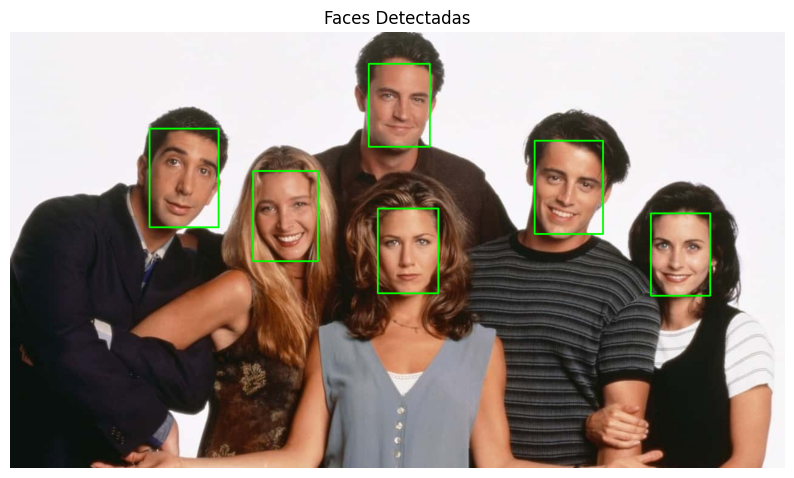

Número de faces detectadas: 6
Detalhes das faces detectadas:
  Face 1: {'box': [866, 179, 113, 154], 'confidence': np.float64(0.9998555183410645), 'keypoints': {'nose': [np.int64(918), np.int64(280)], 'mouth_right': [np.int64(938), np.int64(299)], 'right_eye': [np.int64(951), np.int64(251)], 'left_eye': [np.int64(901), np.int64(240)], 'mouth_left': [np.int64(888), np.int64(287)]}}
  Face 2: {'box': [401, 229, 107, 149], 'confidence': np.float64(0.9998314380645752), 'keypoints': {'nose': [np.int64(455), np.int64(323)], 'mouth_right': [np.int64(486), np.int64(330)], 'right_eye': [np.int64(478), np.int64(284)], 'left_eye': [np.int64(428), np.int64(290)], 'mouth_left': [np.int64(434), np.int64(336)]}}
  Face 3: {'box': [592, 52, 101, 137], 'confidence': np.float64(0.9981812834739685), 'keypoints': {'nose': [np.int64(648), np.int64(139)], 'mouth_right': [np.int64(664), np.int64(157)], 'right_eye': [np.int64(672), np.int64(111)], 'left_eye': [np.int64(624), np.int64(105)], 'mouth_left': [np.

In [2]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import os

image_path = 'friends.jpeg'

if not os.path.exists(image_path):
    print(f"Erro: Arquivo de imagem não encontrado em {image_path}")
else:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    faces = detector.detect_faces(image_rgb)

    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Faces Detectadas')
    plt.axis('off')
    plt.show()

    print(f"Número de faces detectadas: {len(faces)}")
    if len(faces) > 0:
        print("Detalhes das faces detectadas:")
        for i, face in enumerate(faces):
            print(f"  Face {i+1}: {face}")